<h1>1. Data Loading</h1>

In [41]:
import pandas as pd
test = pd.read_csv("Sample/laptops.csv")
test.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


<h1>2. Latihan: Data Cleaning dan Transformation</h1>  
Catatan  
Proses data cleaning ini tidak perlu dilakukan semuanya karena tidak semua data memiliki karakteristik yang sama.  

**Mengidentifikasi Informasi Dataset**  
periksa tipe data dari masing-masing fitur yang ada di dataset.

In [42]:
# Menampilkan ringkasan informasi dari dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [43]:
# Menampilkan statistik deskriptif dari dataset
test.describe(include="all")

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1000,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000
unique,9,6,NaN,6,10,4,18,3,5,NaN,NaN
top,MSI,Business Laptop,NaN,2K,Intel Xeon E3-1505M,8GB,1TB HDD,NVIDIA GeForce GTX 1650,No OS,NaN,NaN
freq,128,176,NaN,181,114,270,105,348,224,NaN,NaN
mean,NaN,NaN,14.496646,NaN,NaN,NaN,NaN,NaN,NaN,3.469800,51602.255339
std,NaN,NaN,2.066624,NaN,NaN,NaN,NaN,NaN,NaN,0.857112,13802.833231
min,NaN,NaN,11.005842,NaN,NaN,NaN,NaN,NaN,NaN,2.000819,30060.275100
25%,NaN,NaN,12.677791,NaN,NaN,NaN,NaN,NaN,NaN,2.720228,40376.617670
50%,NaN,NaN,14.509298,NaN,NaN,NaN,NaN,NaN,NaN,3.477824,50683.971717
75%,NaN,NaN,16.313026,NaN,NaN,NaN,NaN,NaN,NaN,4.189891,61897.280126


In [44]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_value = test.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

**Mengatasi Missing Value**  
pertama-tama, mari kita pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%

In [45]:
less = missing_value[missing_value < 1000].index
over = missing_value[missing_value > 1000].index

- Mengisisi nilai yang hilang -> Numerik

In [ ]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = test[less].select_dtypes(include=['number']).columns
test[numeric_features] = test[numeric_features].fillna(test[numeric_features].median)

Numeric features: Index(['Inches', 'Weight', 'Price'], dtype='object')


Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.
- Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.  
- Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom.

- mengisi nilai hilang -> string/object

In [47]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = test[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
    test[column] = test[column].fillna(test[column].mode()[0])

Kode di atas akan melakukan pengulangan pada setiap kolom yang berisi data kategori dalam DataFrame train. Selanjutnya, setiap kolom kategori akan melakukan proses pergantian untuk semua nilai yang hilang (NaN) dengan nilai modus dari kolom tersebut. Hasil akhirnya adalah semua kolom kategori dalam DataFrame train tidak lagi memiliki nilai yang hilang (NaN) karena semua NaN telah diisi dengan nilai modus dari kolom masing-masing.



- Menghapus Kolom dengan Banyak Nilai yang Hilang diatas 75%

In [48]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = test.drop(columns=over)

Terakhir, lakukan pemeriksaan terhadap data yang sudah melewati tahapan verifikasi missing value dengan kode berikut.

In [49]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

<h3>Mengatasi Outliers</h3>  

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

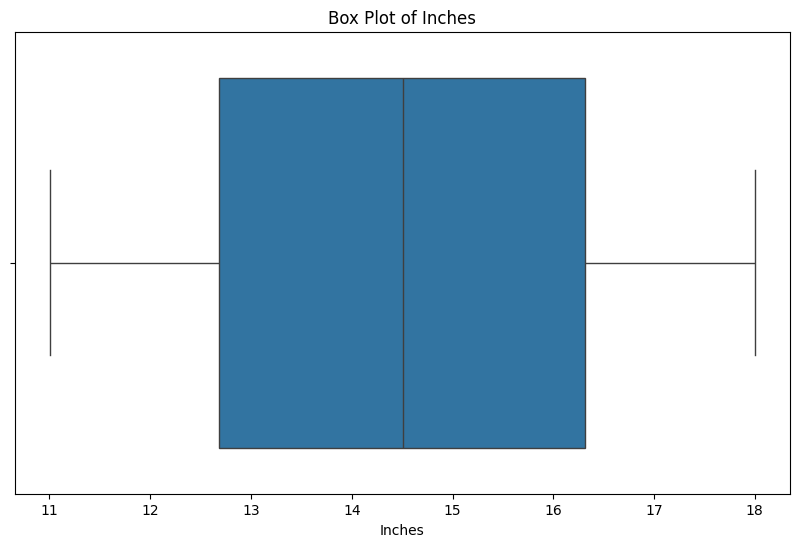

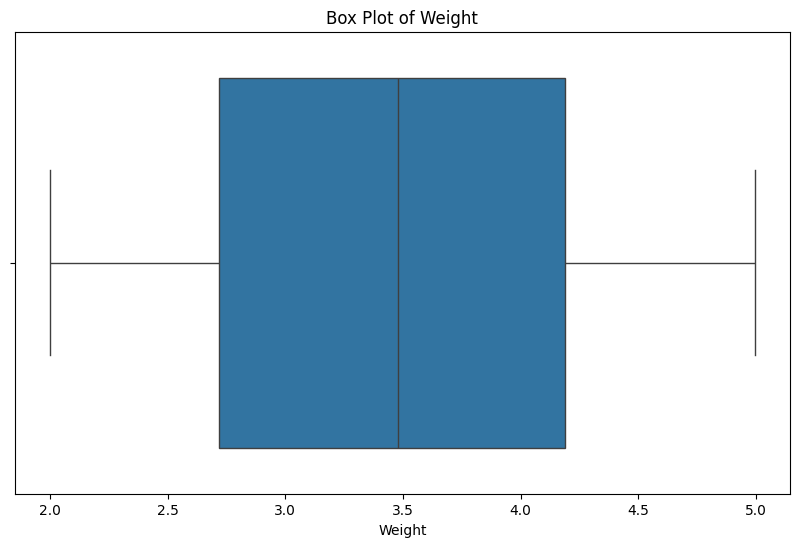

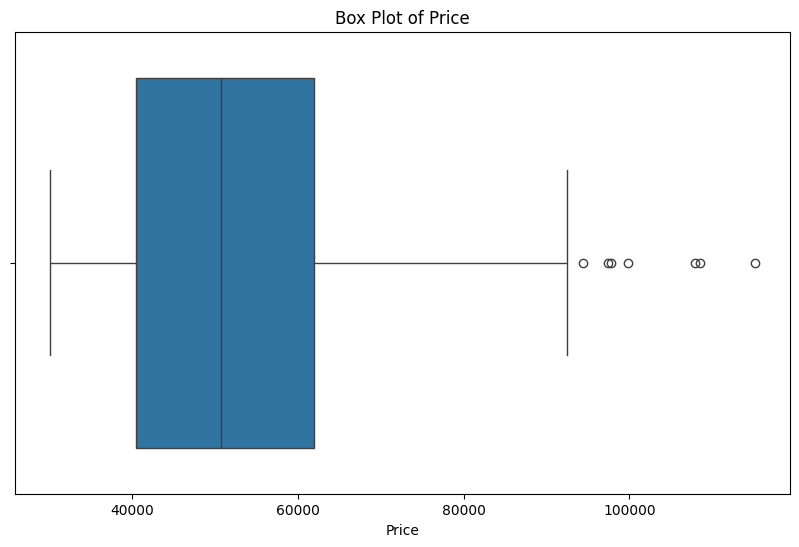

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

1. Anda dapat memilih untuk menghapus outlier.
2. Menggantinya dengan nilai yang lebih moderat (seperti batas terdekat), atau menerapkan transformasi.

Berikut adalah langkah-langkah umum untuk mendeteksi dan menangani outlier menggunakan metode IQR.

1. Menghitung IQR, Q1, dan Q3
- Q1 (Quartile 1): Nilai di persentil ke-25 data.
- Q3 (Quartile 3): Nilai di persentil ke-75 data.
- IQR: Rentang antara Q3 dan Q1 (IQR = Q3 - Q1).
2. Menentukan Batas Bawah dan Batas Atas
- Batas Bawah: Q1 - 1.5 * IQR
- Batas Atas: Q3 + 1.5 * IQR

In [51]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

Selanjutnya mari kita hapus outlier berdasarkan perhitungan di atas.

In [52]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

Pro Tips

Jika Anda tidak ingin menghapus outliers seperti contoh di atas, silakan gunakan metode agregasi seperti berikut.

```
median = df['column_name'].median()
df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)
```
atau

```
# Mengganti outlier dengan nilai batas terdekat
df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)
```

<h3>Normalisasi dan Standardisasi Data</h3>  
Tahap selanjutnya dilakukan jika dataset memiliki fitur numerik dengan skala yang berbeda-beda, kita mungkin perlu melakukan normalisasi atau standardisasi.

**Normalisasi**
Normalisasi (juga dikenal sebagai penskalaan min-max) bertugas untuk mengubah fitur sehingga nilainya berada dalam rentang tertentu, biasanya antara 0 dan 1.

**Standardisasi**
Standardisasi (juga dikenal sebagai penskalaan Z-score) bertugas untuk mengubah skala pada suatu fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

In [53]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Untuk melakukan perbandingan antara data sebelum dan sesudah dilakukan standardisasi, Anda dapat menggunakan kode berikut.

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

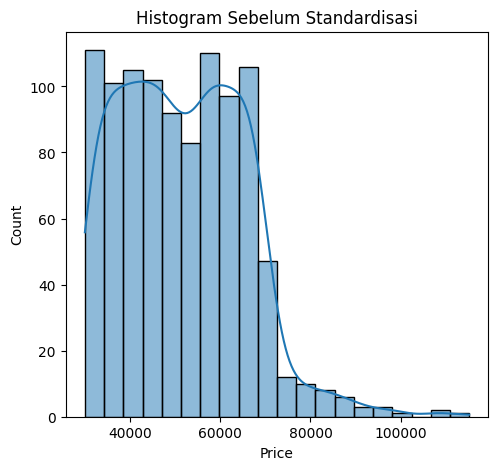

In [65]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test[numeric_features[2]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

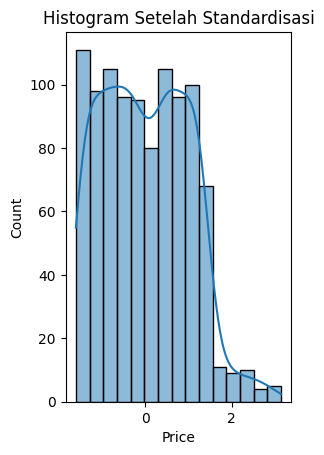

In [66]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[2]], kde=True)
plt.title("Histogram Setelah Standardisasi")

Perhatikan distribusi data pada kedua visualisasi di atas (sebelum dan sesudah standardisasi), terlihat sangat berbeda, ‘kan? Kesimpulannya, standardisasi ini akan meningkatkan kinerja model dengan menyamakan skala fitur, mempercepat konvergensi algoritma optimasi, dan mengurangi risiko overfitting. 

**Menangani Duplikasi Data**  
Pada tahap ini, Anda perlu melakukan pemeriksaan kepada data yang sudah melewati tahapan-tahapan sebelumnya. Proses tersebut dapat Anda lakukan dengan menggunakan kode berikut.

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [country, country_code, has_expired, job_board, job_description, job_title, location, page_url, uniq_id]
Index: []


In [60]:
# Menghapus baris duplikat
df = df.drop_duplicates()
 
print("DataFrame setelah menghapus duplikat:")
print(df)

DataFrame setelah menghapus duplikat:
       Inches    Weight     Price CompanyName        TypeOfLaptop  \
0    1.234422 -1.643057 -1.172013         MSI     Business Laptop   
1    0.993121  0.690857 -1.082568       Chuwi  2 in 1 Convertible   
2    1.357723 -0.664439 -1.363449          hp         WorkStation   
3   -1.436036 -0.649056  1.323920         MSI  2 in 1 Convertible   
4   -0.892000  1.019855 -1.324387   Microsoft              Gaming   
..        ...       ...       ...         ...                 ...   
995  0.847925  1.421027 -0.836265          hp              Gaming   
996  1.433033  0.542958  0.459254   Microsoft         WorkStation   
997 -0.353667  0.675436 -0.230300      lenevo            NoteBook   
998 -1.672455  0.233819  0.585155        Asus           UltraBook   
999 -1.688028  1.555066  0.961782        Dell            NoteBook   

                       ScreenResolution                             Cpu   Ram  \
0    IPS Panel Retina Display 2560x1600             

**Mengonversi Tipe Data**  
Sebagian besar algoritma machine learning didasarkan pada operasi matematika yang melibatkan perhitungan jarak, gradien, atau distribusi data. Misalnya, regresi linier menghitung persamaan garis menggunakan koefisien yang diterapkan pada fitur numerik. Jika data inputan berupa kategori (seperti "merah," "biru," "hijau"), tidak ada cara langsung untuk memasukkan nilai kategori tersebut ke dalam perhitungan matematika.

Sebelum kita melakukan encoding, silakan perhatikan data kategorikal yang ada pada dataset menggunakan kode berikut.

In [59]:
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features]

,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,MSI,Business Laptop,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux
1,Chuwi,2 in 1 Convertible,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS
2,hp,WorkStation,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux
3,MSI,2 in 1 Convertible,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10
4,Microsoft,Gaming,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10
...,...,...,...,...,...,...,...,...
995,hp,Gaming,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10
996,Microsoft,WorkStation,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS
997,lenevo,NoteBook,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10
998,Asus,UltraBook,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS


**One Hot Encoding**  
Penggunaan one hot encoding sangatlah mudah terutama ketika Anda telah memisahkan nama kolom untuk data kategorikal. Perhatikan kode berikut.

In [58]:
df_one_hot = pd.get_dummies(df, columns=categorical_features)
df_one_hot

,Inches,Weight,Price,CompanyName_Acer,CompanyName_Apple,CompanyName_Asus,CompanyName_Chuwi,CompanyName_Dell,CompanyName_MSI,CompanyName_Microsoft,...,Memory_512GB eMMC,Memory_6TB HDD,Gpu_AMD Radeon RX 5600M,Gpu_Intel Iris Xe Graphics,Gpu_NVIDIA GeForce GTX 1650,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 11,OpSys_macOS
0,1.234422,-1.643057,-1.172013,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1,0.993121,0.690857,-1.082568,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,1.357723,-0.664439,-1.363449,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,-1.436036,-0.649056,1.323920,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,-0.892000,1.019855,-1.324387,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.847925,1.421027,-0.836265,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
996,1.433033,0.542958,0.459254,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
997,-0.353667,0.675436,-0.230300,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
998,-1.672455,0.233819,0.585155,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


Kode di atas akan mengubah seluruh data yang ada pada kolom category_features menjadi numerik dengan memisahkan kolom berdasarkan value yang ada.  

Perhatikan jumlah rows dan columns dari output di atas, tentunya sudah terlihat ‘kan perbedaannya? Jumlah kolom yang Anda miliki bertambah sangat banyak yang asalnya berjumlah 77 menjadi 216. Hal ini karena one hot encoding akan memecah suatu fitur menjadi fitur baru dengan struktur “namakolom_value”.

**Label Encoding**  
Berbeda dengan one hot encoding, label encoding membutuhkan sebuah library lainnya untuk mempermudah proses pengerjaannya. Pada kasus ini, Anda akan menggunakan LabelEncoder dari sklearn sebagai senjata utama untuk melakukan encoding. Perhatikan kode berikut.

In [61]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in categorical_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

#hasil
df_lencoder

,Inches,Weight,Price,CompanyName,TypeOfLaptop,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,1.234422,-1.643057,-1.172013,5,1,5,6,0,15,1,0
1,0.993121,0.690857,-1.082568,3,0,2,5,0,0,1,1
2,1.357723,-0.664439,-1.363449,7,5,2,9,3,3,1,0
3,-1.436036,-0.649056,1.323920,5,0,0,6,1,14,1,2
4,-0.892000,1.019855,-1.324387,6,2,2,5,3,15,0,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.847925,1.421027,-0.836265,7,2,3,0,3,1,0,2
996,1.433033,0.542958,0.459254,6,5,1,4,3,12,2,4
997,-0.353667,0.675436,-0.230300,8,3,3,2,1,0,2,2
998,-1.672455,0.233819,0.585155,2,4,5,7,0,2,1,1


One hot encoding dan label encoding adalah dua teknik yang sering digunakan untuk mengubah data kategorikal menjadi format numerik yang dapat digunakan dalam algoritma machine learning. Keduanya memiliki kelebihan dan kekurangan tergantung pada konteks penggunaannya.